This notebook is for visualise the molecules chosen via Butina clustering, as well as to inspect the cluster members.

In [1]:
from rdkit import Chem
from rdkit import DataStructs

from rdkit.Chem import rdDepictor, rdMolDescriptors, rdFMCS, AllChem

from tqdm import tqdm
from rdkit.ML.Cluster.Butina import ClusterData
from rdkit.DataManip.Metric import GetTanimotoDistMat

from IPython.core.display import display, HTML, Math

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import mols2grid


rdDepictor.SetPreferCoordGen(True)

import rdkit
%pylab inline
print(rdkit.__version__)


INFO:rdkit:Enabling RDKit 2022.03.2 jupyter extensions


Populating the interactive namespace from numpy and matplotlib
2022.03.2


In [2]:
data_dir = '../../data'

### Mpro

In [3]:
df_mpro_picks = pd.read_csv(f'{data_dir}/manifold-mpro-picks_new.csv')
df_mpro_picks['mol'] = df_mpro_picks['smiles'].apply(Chem.MolFromSmiles)
df_mpro_picks['index'] = df_mpro_picks.index.values
mpro_grid = mols2grid.display(df_mpro_picks,
                              template="pages",
                              smiles_col='smiles',
                              mol_col='mol',
                              n_rows=15, 
                              n_cols=4, 
                              subset=["img", 'index' ], 
                              # subset=["img", "membership", 'smiles'], 
                            #   transform={"membership": lambda x: f"Size of Cluster: {x}"},
                              tooltip=['smiles'],
                              maxMols=60, 
                              size=(300, 150),
                              selection=True)
display(HTML('<b>Mpro Butina</b>'))
display(mpro_grid)


Selection

In [6]:
interesting_mols = [1, 5, 10, 14, 15, 19, 22, 27, 44]
mpro_grid = mols2grid.display(df_mpro_picks.query('index in @interesting_mols'),
                              template="table",
                              smiles_col='smiles',
                              mol_col='mol',
                              n_rows=3, 
                              n_cols=3, 
                              subset=["img"], 
                              # subset=["img", "membership", 'smiles'], 
                            #   transform={"membership": lambda x: f"Size of Cluster: {x}"},
                              tooltip=['smiles'],
                              maxMols=60, 
                              size=(300, 150),
                              prerender=True,
                              fixedBondLength=25,
                              fixedScale=1.0,)
display(HTML('<b>Mpro Butina</b>'))
display(mpro_grid)

In [7]:
df_mpro_picks.query('index in @interesting_mols').smiles

1         NS(=O)(=O)c1ccc(F)c(CNS(=O)(=O)c2ccccc2F)c1
5        NS(=O)(=O)c1cccc(NC(=O)COC(=O)c2ccc(F)cc2)c1
10      NS(=O)(=O)c1ccc(F)c(C(=O)NCC(O)c2cccc(F)c2)c1
14           NC(=O)c1cccc(NC(=O)NC2COc3ccc(F)cc3C2)c1
15           NC(=O)c1cc(CNC(=O)C(=O)Nc2cc(F)ccc2F)on1
19    O=C(CNC(=O)c1ccc(F)cc1)Nc1ccc2[nH]c(=O)[nH]c2c1
22            O=C(NCc1nnc2c(=O)[nH]ccn12)Nc1cccc(F)c1
27               Nc1ncncc1CNC(=O)C(=O)Nc1ccc(F)c(F)c1
44     O=S(=O)(NCC(O)c1ccc(F)cc1)c1c[nH]c2nccc(Cl)c12
Name: smiles, dtype: object

### Mac-1

In [11]:
df_mac1_picks = pd.read_csv(f'{data_dir}/manifold-mac1-picks_new.csv')

df_mac1_picks['mol'] = df_mac1_picks['smiles'].apply(Chem.MolFromSmiles)
df_mac1_picks['index'] = df_mac1_picks.index.values

mac1_grid = mols2grid.display(df_mac1_picks,
                              template="table",
                              smiles_col='smiles',
                              mol_col='mol',
                              n_rows=15, 
                              n_cols=4, 
                              subset=["img", "index"], 
                            #   subset=["img", "membership", 'smiles'], 
                            #   transform={"membership": lambda x: f"Size of Cluster: {x}"},
                              tooltip=['smiles'],
                              prerender=True,
                              maxMols=60, 
                              size=(300, 150),)
display(HTML('<b>Mac-1 Butina</b>'))
display(mac1_grid)


In [16]:
interesting_mols = [0, 3, 8, 21, 28, 30, 36, 60]
mac1_grid = mols2grid.display(df_mac1_picks.query('index in @interesting_mols'),
                              template="table",
                              smiles_col='smiles',
                              mol_col='mol',
                              n_rows=3, 
                              n_cols=3, 
                              subset=["img"], 
                              # subset=["img", "membership", 'smiles'], 
                            #   transform={"membership": lambda x: f"Size of Cluster: {x}"},
                              tooltip=['smiles'],
                              maxMols=60, 
                              size=(300, 150),
                              prerender=True,
                              fixedBondLength=25,
                              fixedScale=1.0,)
display(HTML('<b>Mac1 Butina</b>'))
display(mac1_grid)

In [17]:
df_mac1_picks.query('index in @interesting_mols').smiles

0              O=C(c1ccnc2[nH]c(O)nc12)N1CCCCCC1
3        CCC(CNC(=O)CCC1CCCCC1)Nc1ncnc2[nH]cnc12
8      CCCNS(=O)(=O)c1cnc2[nH]c(=O)[nH]c(=O)c2c1
21         Cn1ncc2c(=O)nc(NC(=O)C3CCCCC3)[nH]c21
28      CCc1nn(C)c2[nH]nc(NC(=O)Nc3ccc(F)cc3)c12
30        CCC(NC(CNC(c(ccn1)c2c1[nH]cn2)=O)CC)=O
36               CC(=O)N1CCCC1CNc1ncnc2[nH]cnc12
60    CCCN1CCN(C(=O)c2cnc3[nH]c(=O)nc(O)c3c2)CC1
Name: smiles, dtype: object

Adenosine

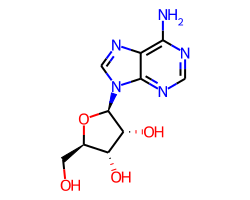

In [ ]:
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG

mol = Chem.MolFromSmiles('n2c1c(ncnc1n(c2)[C@@H]3O[C@@H]([C@@H](O)[C@H]3O)CO)N')
d2d = rdMolDraw2D.MolDraw2DSVG(300, 150)
d2d.DrawMolecule(mol)
d2d.FinishDrawing()
text = d2d.GetDrawingText()
SVG(text)


In [14]:
def plot_cluster_members(df, list_of_cluster_indices, align_mcs=True):
    """A function to generate an image for the molecules from the selected cluster"""
    mol_list = []
    img = "Nothing selected"
    if len(list_of_cluster_indices):
        sel_df = df.query("cluster in @list_of_cluster_indices")
        # sel_df = df.iloc[sel]
        mol_list = [Chem.MolFromSmiles(x) for x in sel_df.smiles]
        # strip counterions
        # Align structures on the MCS
        if align_mcs and len(mol_list) > 1:
            mcs = rdFMCS.FindMCS(mol_list)
            mcs_query = Chem.MolFromSmarts(mcs.smartsString)
            AllChem.Compute2DCoords(mcs_query)
            for m in mol_list:
                AllChem.GenerateDepictionMatching2DStructure(m, mcs_query)
        # legends = list(sel_df.smiles.astype(str))
        grid = mols2grid.display(mol_list, template="pages",
                  n_rows=15, n_cols=4, subset=["img"],
                  tooltip=['SMILES'],
                  maxMols=60, size=(300, 150), selection=False)
    return grid


df_mpro_already_clustered = pd.read_csv(f'{data_dir}/mpro_taut_clustered.csv')
clusters_to_plot = [0]
display(HTML(f'<b>Mpro Members in Cluster: {clusters_to_plot}</b>'))
display(plot_cluster_members(df_mpro_already_clustered, clusters_to_plot, True))


In [15]:
df_mac1_already_clustered = pd.read_csv(f'{data_dir}/mac1_taut_clustered.csv')
clusters_to_plot = [3]
display(HTML(f'<b>Mpro Members in Cluster: {clusters_to_plot}</b>'))
display(plot_cluster_members(df_mac1_already_clustered, clusters_to_plot, True))
